In [9]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# red, blue, green, yellow, purple, orange, teal blue, pink, other color
palette=['#ff3b30', '#4cd964','#ffcc00',  '#007aff','#5856d6', '#ff9500', '#5ac8fa', '#ff2d55','#969783']
markers=['o', '^', '<', 'd', '*','2']
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':12})
rc('text', usetex=False)
import os

In [10]:
basepath="./"

In [11]:

def plot_quantile_nmse(total, name, title, metric_name, use_logy=False, show_ylabel=True, use_hatches=False):
    ode_transformer=[abs(float(line.split("\t")[0])) for line in total.split("\n")]
    act_ode=[abs(float(line.split("\t")[1])) for line in total.split("\n")]
    length=len(total.split("\n"))
    print(length)
    df=pd.DataFrame({
        "model": act_ode+ode_transformer,
        "type": ['ACTODE(ours)']*length+['ODEFormer']*length,
    })
    

    plt.figure(figsize=(4,2.9))
    ax=sns.boxplot(data=df, x="model", y="type", 
                   showfliers=True, 
                   width=0.5, hue='type',
                    palette=palette)
    ax.set_title(title, fontsize=16)
    ax.set(xlabel=metric_name, ylabel="")
    if use_logy==True:
        plt.xscale('log', base=10)
        
    if show_ylabel==False:
        ax.set(yticklabels=[])
    if use_hatches==True:
        hatches = ["/", "o", "*", "\\"]
        for hatch, patch in zip(hatches, ax.artists):
            patch.set_hatch(hatch)
    plt.yticks(rotation=40)    

    fname = os.path.join(basepath, name+".pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

# Strongatz dataset

/tmp/ipykernel_77622/1543305413.py:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax=sns.boxplot(data=df, x="model", y="type",
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palat

22


findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


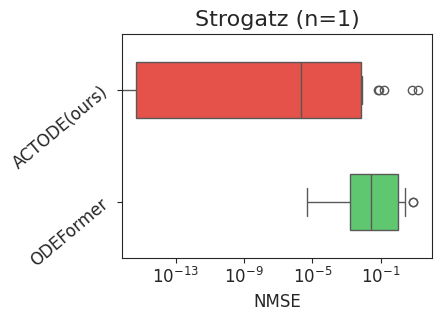

In [15]:
total="""1.93E-05	0
0.005040090376	-3.38E-16
0.008444352462	-3.13E-18
0.001390256179	-4.00E-06
0.9937783921	-0.1673301492
0.09801504605	-0.003072098889
1.121751673	-0.0004341880742
8.270076057	-1.20E-07
0.001156716853	-8.32E-06
0.2095195479	-8.90E-16
1.364097228	-6.774733802
0.03856159872	-0.08000183193
0.0004189361024	-0.007813674066
0.002577059738	-7.01E-18
0.0138877647	-3.24E-18
0.1018359252	-2.89E-16
2.659891547	-0.07300326977
0.001395978476	-15.06006074
4.61E-06	-6.58E-15
8.057234096	-0.00696794363
0.01036744719	-1.90E-09
1.312553053	-4.05E-15"""
metric_name="NMSE"
name=r"strogatz_"+metric_name+"_vars1"
title=r"Strogatz (n=1)"
plot_quantile_nmse(total, name, title,metric_name=metric_name, use_logy=True, show_ylabel=True)
